# Decision Tree classifier

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = sns.load_dataset('iris')

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
df['species'] = df['species'].map({'setosa':0,'virginica':1,'versicolor':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [23]:
# partition independent and dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [25]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    1
 146    1
 147    1
 148    1
 149    1
 Name: species, Length: 150, dtype: int64)

In [33]:
# test train split
from sklearn.model_selection import train_test_split


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
X_train,X_test

(     sepal_length  sepal_width  petal_length  petal_width
 81            5.5          2.4           3.7          1.0
 133           6.3          2.8           5.1          1.5
 137           6.4          3.1           5.5          1.8
 75            6.6          3.0           4.4          1.4
 109           7.2          3.6           6.1          2.5
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [105 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [39]:
y_train,y_test

(81     2
 133    1
 137    1
 75     2
 109    1
       ..
 71     2
 106    1
 14     0
 92     2
 102    1
 Name: species, Length: 105, dtype: int64,
 73     2
 18     0
 118    1
 78     2
 76     2
 31     0
 64     2
 141    1
 68     2
 82     2
 110    1
 12     0
 36     0
 9      0
 19     0
 56     2
 104    1
 69     2
 55     2
 132    1
 29     0
 127    1
 26     0
 128    1
 131    1
 145    1
 108    1
 143    1
 45     0
 30     0
 22     0
 15     0
 65     2
 11     0
 42     0
 146    1
 51     2
 27     0
 4      0
 32     0
 142    1
 85     2
 86     2
 16     0
 10     0
 Name: species, dtype: int64)

In [67]:
#train model
from sklearn.tree import DecisionTreeClassifier

In [121]:
# prepruning technique
treemodel =  DecisionTreeClassifier(max_depth = 2);

In [123]:
 treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [125]:
y_pred = treemodel.predict(X_test)

In [127]:
y_pred

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0], dtype=int64)

In [129]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]')]

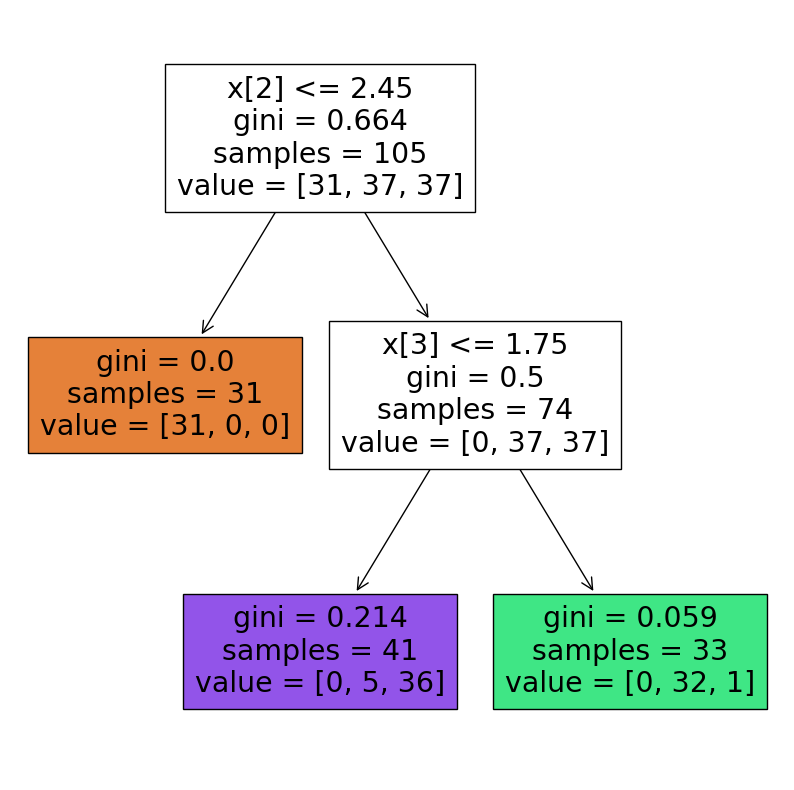

In [131]:
plt.figure(figsize=(10,10))
tree.plot_tree(treemodel,filled=True)

In [132]:
from sklearn.metrics import accuracy_score

In [135]:
score = accuracy_score(y_test,y_pred)
score

1.0

In [139]:
#PostPruning technique
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["gini", "entropy", "log_loss"],
    'splitter':["best", "random"],
    'max_depth':[1,2,3,4,5,6,7,8,9,10] }

In [141]:
cv = GridSearchCV(treemodel,parameters,scoring='accuracy',cv=5)

In [143]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [145]:
pred = cv.predict(X_test)

In [147]:
pred

array([2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0], dtype=int64)

In [149]:
score = accuracy_score(y_test,pred)
score

0.9555555555555556